# 1 : Librairies et options

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import gensim
import tensorflow_hub as hub
from transformers import AutoModel, BertTokenizerFast
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import manifold, decomposition
from sklearn import cluster, metrics

import nltk
nltk.download('popular', quiet = True)
from sklearn.feature_extraction.text import CountVectorizer

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) # Largeur écran
pd.set_option('display.max_columns', 500)
pd.set_option('mode.chained_assignment', None) # Pour ne pas avoir de message d'erreur quand on crée nouvelle df à partir d'une autre (app)

C:\Users\Johan\Formation DS OPC\Projet 3\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2 : Ouverture du fichier

In [2]:
df = pd.read_csv('DataP6.csv')

# 3 : Définitions 

In [3]:
# Split des données :

def TrainTest (X, y) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42, stratify = y)
    return X_train, X_test, y_train, y_test

In [4]:
# Regression Logistic :

def RL (X_train, y_train, X_test, y_test) :
    modelLR = LogisticRegression(max_iter = 1000).fit(X_train, y_train)

    AccuracyTrain = round(modelLR.score(X_train,y_train),3)
    AccuracyTest = round(modelLR.score(X_test,y_test),3)
    
    return AccuracyTrain, AccuracyTest

In [5]:
# Arbre de décision :

def DecisionTree (X_train, y_train, X_test, y_test) :
    dico = {'max_depth' : range(2,5), "min_samples_leaf" : [5, 10, 15, 20]}
    SKF = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42).split(X_train, y_train)
    modelDTC = GridSearchCV(DecisionTreeClassifier(random_state = 42), dico, refit=True, cv = SKF).fit(X_train, y_train)

    AccuracyTrain = round(modelDTC.score(X_train,y_train),3)
    AccuracyTest = round(modelDTC.score(X_test,y_test),3)
    
    return AccuracyTrain, AccuracyTest

In [6]:
# KNN :

def KNN (X_train, y_train, X_test, y_test) :
    dico = {'n_neighbors' : range(2,50), 'weights' : ['uniform', 'distance']}
    SKF = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42).split(X_train, y_train)
    modelKNN = GridSearchCV(KNeighborsClassifier(), dico, refit=True, cv = SKF).fit(X_train, y_train)

    AccuracyTrain = round(modelKNN.score(X_train,y_train),3)
    AccuracyTest = round(modelKNN.score(X_test,y_test),3)
    
    return AccuracyTrain, AccuracyTest

In [7]:
# Random Forest :

def RandomForest (X_train, y_train, X_test, y_test) :
    dico = {'max_depth' : range(3,6), 'n_estimators' : [300,400,500], 'min_samples_leaf': [4, 5, 6]}
    SKF = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42).split(X_train, y_train)
    modelRF = GridSearchCV(RandomForestClassifier(random_state = 42), dico, refit=True, cv = SKF).fit(X_train, y_train)

    AccuracyTrain = round(modelRF.score(X_train,y_train),3)
    AccuracyTest = round(modelRF.score(X_test,y_test),3)
    
    return AccuracyTrain, AccuracyTest

In [8]:
# Suport Vecteur Machine :

def SVM (X_train, y_train, X_test, y_test) :
    dico = {'C': np.logspace(-2, 5, 6), 'gamma': np.logspace(-4, 1, 6)}
    SKF = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42).split(X_train, y_train)
    modelSVC = GridSearchCV(SVC(), dico, cv = SKF, refit=True).fit(X_train, y_train)

    AccuracyTrain = round(modelSVC.score(X_train,y_train),3)
    AccuracyTest = round(modelSVC.score(X_test,y_test),3)
    
    return AccuracyTrain, AccuracyTest

In [9]:
# Réduction des variables par PCA :

def PCA (value, nb):
    pca = decomposition.PCA(n_components = nb)
    feat_pca= pca.fit_transform(value)
    return feat_pca

In [10]:
# Réduction des variables par TSNE (en 2D pour visualisation des clusters) :

def TSNE (value) : 
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
    X_tsne = tsne.fit_transform(value)
    return X_tsne

In [11]:
# Graphique 2D sur TSNE clusters reels et clusters via KMeans :

def graphTSNE (X_tsne) : 
    df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
    df_tsne["class"] = df['TreeNiv1']

    plt.figure(figsize=(8,5))
    sns.scatterplot(
        x="tsne1", y="tsne2", hue="class", palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
        data = df_tsne, legend="brief")

    plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
    plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
    plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
    plt.legend(prop={'size': 14}) 

    plt.show()

In [12]:
# Def création des clusters via KMeans plus projection Graphique :

def GraphClusters (X_tsne):
    df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
    df_tsne["class"] = df['TreeNiv1']
    cls = cluster.KMeans(n_clusters=7, n_init=100)
    cls.fit(X_tsne)
    
    df_tsne["cluster"] = cls.labels_

    plt.figure(figsize=(8,5))
    sns.scatterplot(x="tsne1", y="tsne2", hue="cluster",
    palette = sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne, legend="brief")

    plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
    plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
    plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
    plt.legend(prop={'size': 14}) 

    plt.show()

    labels = df['TreeNiv1']
    print("ARI : ", round(metrics.adjusted_rand_score(labels, cls.labels_),2))

In [13]:
# Graphiques avec les vrais labels et les labels issus d'un KMeans :

def graphsTSNE (X_tsne) : 
    # Graphiques vraies classes :
    df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
    df_tsne["class"] = df['TreeNiv1']

    plt.subplots(1, 3, figsize=(20,5))
    plt.subplot(131)
    sns.scatterplot(
        x="tsne1", y="tsne2", hue="class", palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
        data = df_tsne, legend="brief")

    plt.title('TSNE selon les vraies classes :', fontsize = 15, fontweight = 'bold')
    plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
    plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
    plt.legend(prop={'size': 14}) 
    
    # graphiques avec classes faites par KMeans :
    cls = cluster.KMeans(n_clusters=7, n_init=100)
    cls.fit(X_tsne)
    df_tsne["cluster"] = cls.labels_

    plt.subplot(132)
    sns.scatterplot(x="tsne1", y="tsne2", hue="cluster",
    palette = sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne, legend="brief")

    plt.title('TSNE selon les clusters :', fontsize = 15, fontweight = 'bold')
    plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
    plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
    plt.legend(prop={'size': 14})

    
    # Création de la matrice de confusion :
    try:
        labels = df['TreeNiv1']
        conf_mat = metrics.confusion_matrix(labels, cls.labels_)
        corresp = np.argmax(conf_mat, axis=0)
        labels = pd.Series(labels, name="y_true").to_frame()
        labels['y_pred'] = cls.labels_
        labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x])


        cls_labels_transform = np.array(labels['y_pred_transform'])
        labels = df['TreeNiv1']
        conf_mat2 = metrics.confusion_matrix(labels, cls_labels_transform)
        list_labels = df['TreeNiv1Texte'].unique()

        df_cm = pd.DataFrame(conf_mat2, index = [label for label in list_labels], columns = [i for i in "0123456"])
        plt.subplot(133)
        plt.title('Matrice de confusion :', size = 15, fontweight = 'bold' )
        sns.heatmap(df_cm.T, annot=True, cmap="Blues")
        plt.xlabel('Groupes KMeans', fontsize = 15, fontweight = 'bold')
        plt.show()

    except:
        labels = df.iloc[:525]['TreeNiv1']
        conf_mat = metrics.confusion_matrix(labels, cls.labels_)
        corresp = np.argmax(conf_mat, axis=0)
        labels = pd.Series(labels, name="y_true").to_frame()
        labels['y_pred'] = cls.labels_
        labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x])


        cls_labels_transform = np.array(labels['y_pred_transform'])
        labels = df.iloc[:525]['TreeNiv1']
        conf_mat2 = metrics.confusion_matrix(labels, cls_labels_transform)
        list_labels = df['TreeNiv1Texte'].unique()

        df_cm = pd.DataFrame(conf_mat2, index = [label for label in list_labels], columns = [i for i in "0123456"])
        plt.subplot(133)
        plt.title('Matrice de confusion :', size = 15, fontweight = 'bold' )
        sns.heatmap(df_cm.T, annot=True, cmap="Blues")
        plt.xlabel('Groupes KMeans', fontsize = 15, fontweight = 'bold')
        plt.show()   
    
    print("La mesure de ARI est de {} pour ce modèle d'extraction des features.".format(round(metrics.adjusted_rand_score(labels, cls.labels_),3)))

# 4 : Etude NLP de la colonne texte

## 4.1 : CountVectorizer

### 4.1.1 : Extraction des features

In [14]:
# bag of words :
vectorizer = CountVectorizer().fit(df['DescriptionGlobaleToken']) # max_features = 2 a ajouter si besoin.
sparse_matrix = vectorizer.transform(df['DescriptionGlobaleToken'])
sparse_matrix

<1050x4140 sparse matrix of type '<class 'numpy.int64'>'
	with 32702 stored elements in Compressed Sparse Row format>

### 4.1.2 : Réduction des dimensions et etude graphique des clusters

In [15]:
# Réduction des dimensions (le PCA ne marchant pas sur des sparse_matrix):
svd = TruncatedSVD(n_components = 1000, random_state=42)
X = svd.fit_transform(sparse_matrix)

In [16]:
X_tsne = TSNE(X)

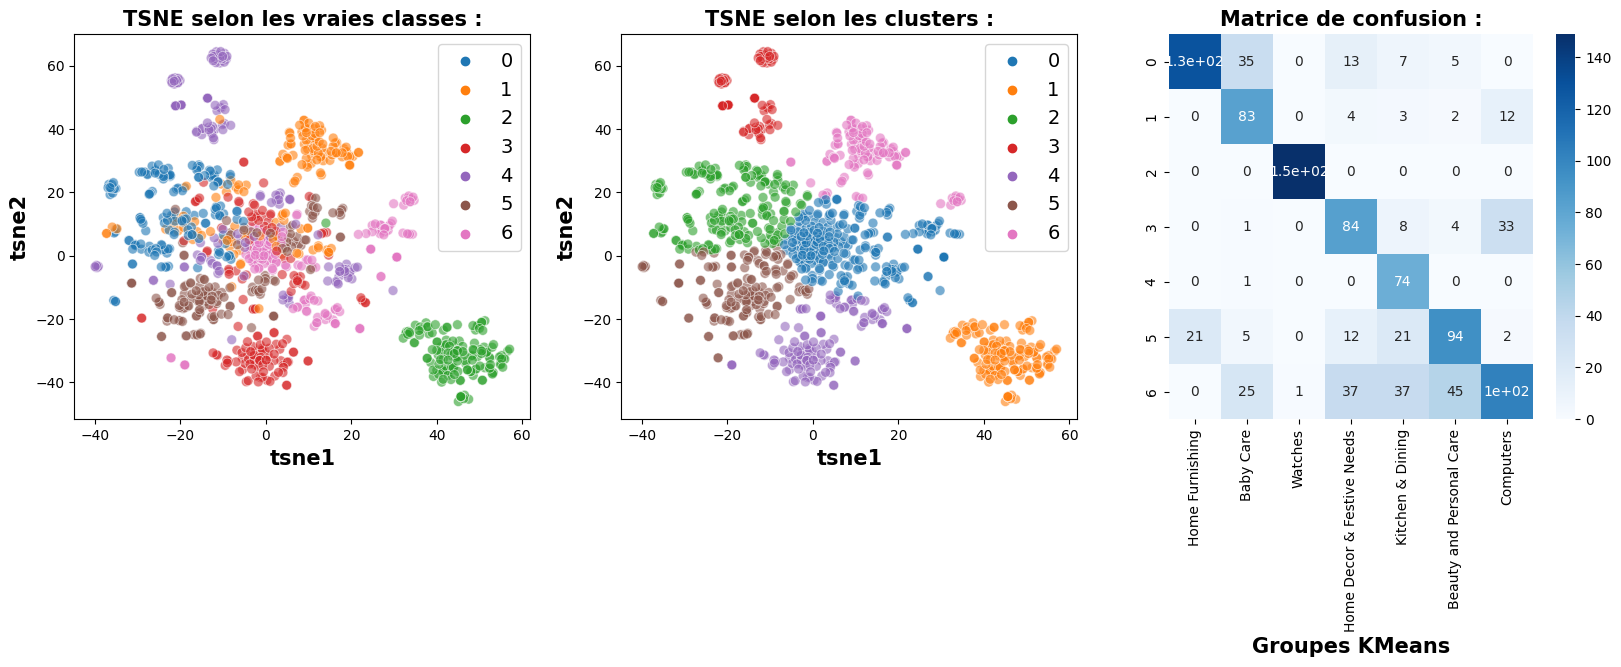

La mesure de ARI est de 0.432 pour ce modèle d'extraction des features.


In [17]:
graphsTSNE(X_tsne)

### 4.1.3 : Machine Learning

In [18]:
X = X
y = df['TreeNiv1']

In [19]:
# Machine Learning :
X_train, X_test, y_train, y_test = TrainTest (X, y)
Regression = RL(X_train, y_train, X_test, y_test)
DT = DecisionTree(X_train, y_train, X_test, y_test)
KNNs = KNN(X_train, y_train, X_test, y_test)
RF = RandomForest(X_train, y_train, X_test, y_test)
SVMC = SVM(X_train, y_train, X_test, y_test)

# Tableau de résultats
Resultats = pd.DataFrame()
Models = ['Regression', 'DT', 'KNNs', 'RF', 'SVMC']
for model in Models :
    Res = pd.DataFrame(locals()[model]).T.rename(columns = {0:'AccuracyTrain', 1:'AccuracyTest'}).rename(index = {0 : str(model)})
    Resultats = pd.concat([Resultats, Res])
Resultats.sort_values('AccuracyTest', ascending = False)

,AccuracyTrain,AccuracyTest
Regression,1.000,0.952
SVMC,0.988,0.949
RF,0.982,0.879
KNNs,1.000,0.876
DT,0.541,0.517


## 4.2 : Tfidf

### 4.2.1 : Extraction des features

In [20]:
# tfidf :
tfidf = TfidfVectorizer().fit(df['DescriptionGlobaleToken'])
matrix_tfidf = tfidf.transform(df['DescriptionGlobaleToken'])
matrix_tfidf

<1050x4140 sparse matrix of type '<class 'numpy.float64'>'
	with 32702 stored elements in Compressed Sparse Row format>

### 4.2.2 : Réduction des dimensions

In [21]:
# Réduction des dimmensions (le PCA ne marchant pas sur des matrix):
svd = TruncatedSVD(n_components = 1000, random_state=42)
X = svd.fit_transform(matrix_tfidf)

In [22]:
X_tsne = TSNE(X)

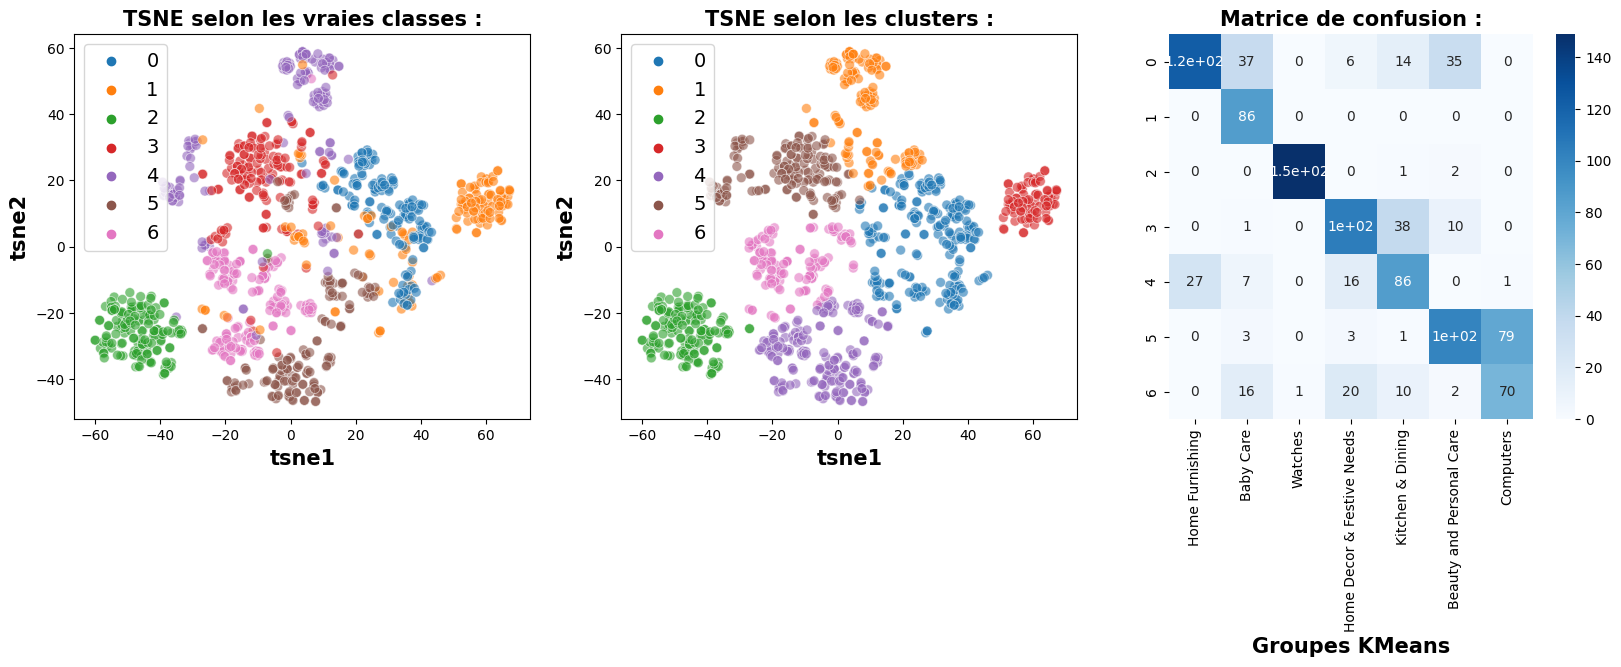

La mesure de ARI est de 0.477 pour ce modèle d'extraction des features.


In [23]:
graphsTSNE(X_tsne)

### 4.2.3 : Machine Learning

In [24]:
X = X
y = df['TreeNiv1']

In [25]:
# Machine Learning :
X_train, X_test, y_train, y_test = TrainTest (X, y)
Regression = RL(X_train, y_train, X_test, y_test)
DT = DecisionTree(X_train, y_train, X_test, y_test)
KNNs = KNN(X_train, y_train, X_test, y_test)
RF = RandomForest(X_train, y_train, X_test, y_test)
SVMC = SVM(X_train, y_train, X_test, y_test)

# Tableau de résultats
Resultats = pd.DataFrame()
Models = ['Regression', 'DT', 'KNNs', 'RF', 'SVMC']
for model in Models :
    Res = pd.DataFrame(locals()[model]).T.rename(columns = {0:'AccuracyTrain', 1:'AccuracyTest'}).rename(index = {0 : str(model)})
    Resultats = pd.concat([Resultats, Res])
Resultats.sort_values('AccuracyTest', ascending = False)

,AccuracyTrain,AccuracyTest
SVMC,1.000,0.949
Regression,0.988,0.937
KNNs,1.000,0.924
RF,0.935,0.863
DT,0.721,0.689


## 4.3 : Word2Vec

### 4.3.1 : Extraction des features

In [26]:
#   size : Le nombre de dimensions des encastrements (la valeur par défaut est 100).
#   window : La distance maximale entre un mot cible et les mots autour du mot cible (la valeur par défaut est 5).
#   min_count : le nombre minimum de mots à prendre en compte lors de la formation du modèle (la valeur par défaut est 5).
#   workers : le nombre de partitions pendant la formation (la valeur par défaut est 3).
#   sg : l'algorithme d'entraînement, soit 0 pour CBOW, soit 1 pour sauter un gramme (la valeur par défaut est 0).

df['descriptionW2V'] = df['DescriptionGlobale'].apply(lambda x: gensim.utils.simple_preprocess(x))
modelW2V = gensim.models.Word2Vec(df['descriptionW2V'], vector_size=100, window=5, min_count=2)
words = set(modelW2V.wv.index_to_key )
X = np.array([np.array([modelW2V.wv[i] for i in ls if i in words]) for ls in df['descriptionW2V']])

X_vect = []
for v in X:
    if v.size:
        X_vect.append(v.mean(axis=0))
    else:
        X_vect.append(np.zeros(100, dtype=float))

X_vect = pd.DataFrame(X_vect)

C:\Users\Johan\AppData\Local\Temp\ipykernel_13388\1838917281.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([np.array([modelW2V.wv[i] for i in ls if i in words]) for ls in df['descriptionW2V']])


###  4.3.2 : Réduction des features :

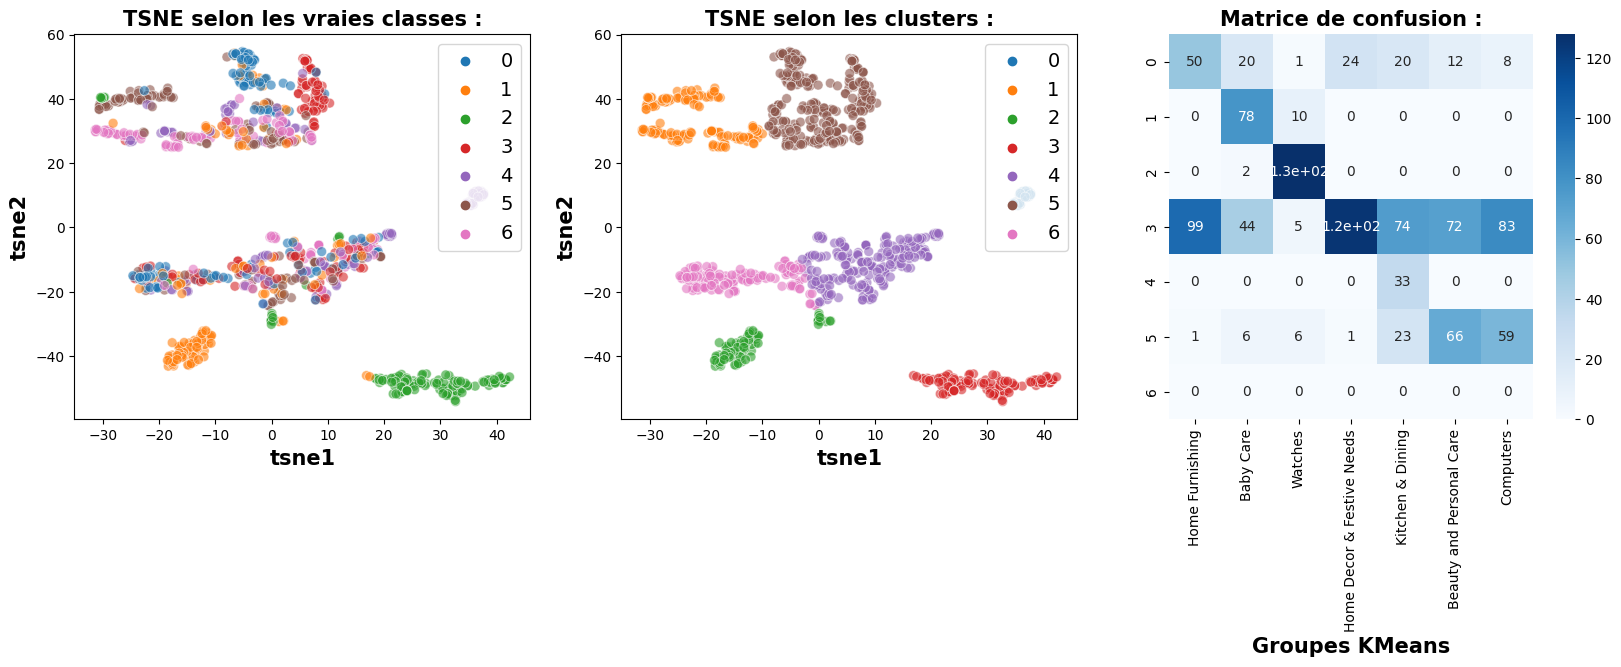

La mesure de ARI est de 0.212 pour ce modèle d'extraction des features.


In [27]:
# Réduction des dimmensions :
X_tsne = TSNE(X_vect)

# Graphiques et score ARI :
graphsTSNE(X_tsne)

### 4.3.3 : Machine Learning

In [28]:
X = X_vect
y = df['TreeNiv1']

In [29]:
# Machine Learning :
X_train, X_test, y_train, y_test = TrainTest (X, y)
Regression = RL(X_train, y_train, X_test, y_test)
DT = DecisionTree(X_train, y_train, X_test, y_test)
KNNs = KNN(X_train, y_train, X_test, y_test)
RF = RandomForest(X_train, y_train, X_test, y_test)
SVMC = SVM(X_train, y_train, X_test, y_test)

# Tableau de résultats
Resultats = pd.DataFrame()
Models = ['Regression', 'DT', 'KNNs', 'RF', 'SVMC']
for model in Models :
    Res = pd.DataFrame(locals()[model]).T.rename(columns = {0:'AccuracyTrain', 1:'AccuracyTest'}).rename(index = {0 : str(model)})
    Resultats = pd.concat([Resultats, Res])
Resultats.sort_values('AccuracyTest', ascending = False)

,AccuracyTrain,AccuracyTest
SVMC,0.906,0.886
KNNs,1.000,0.756
Regression,0.751,0.714
RF,0.756,0.689
DT,0.507,0.473


## 4.4 : BERT

### 4.4.1 : Extraction des Features

In [30]:
# Split de la DF le BERT étant trop lourd pour mes CPU :
skf = StratifiedKFold(n_splits=2)
for part1, part2 in skf.split(df['DescriptionGlobale'], df['TreeNiv1']):
    P1 = df.loc[part1,:]
    P2 = df.loc[part2,:]
    
P2['TreeNiv1'].value_counts()
P1['TreeNiv1'].value_counts()

0    75
1    75
2    75
3    75
4    75
5    75
6    75
Name: TreeNiv1, dtype: int64

- **Même nombre dans chaque catégories.**

In [31]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

inputs = tokenizer(P1['DescriptionGlobale'].tolist(), max_length = 60, truncation=True, return_tensors="pt", padding=True)
inputs = inputs['input_ids']
outputs = model(inputs)
last_hidden_states = outputs[0]
arr = last_hidden_states.detach().numpy()
print(arr.shape)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(525, 60, 768)


### 4.4.2 : Réduction des dimensions

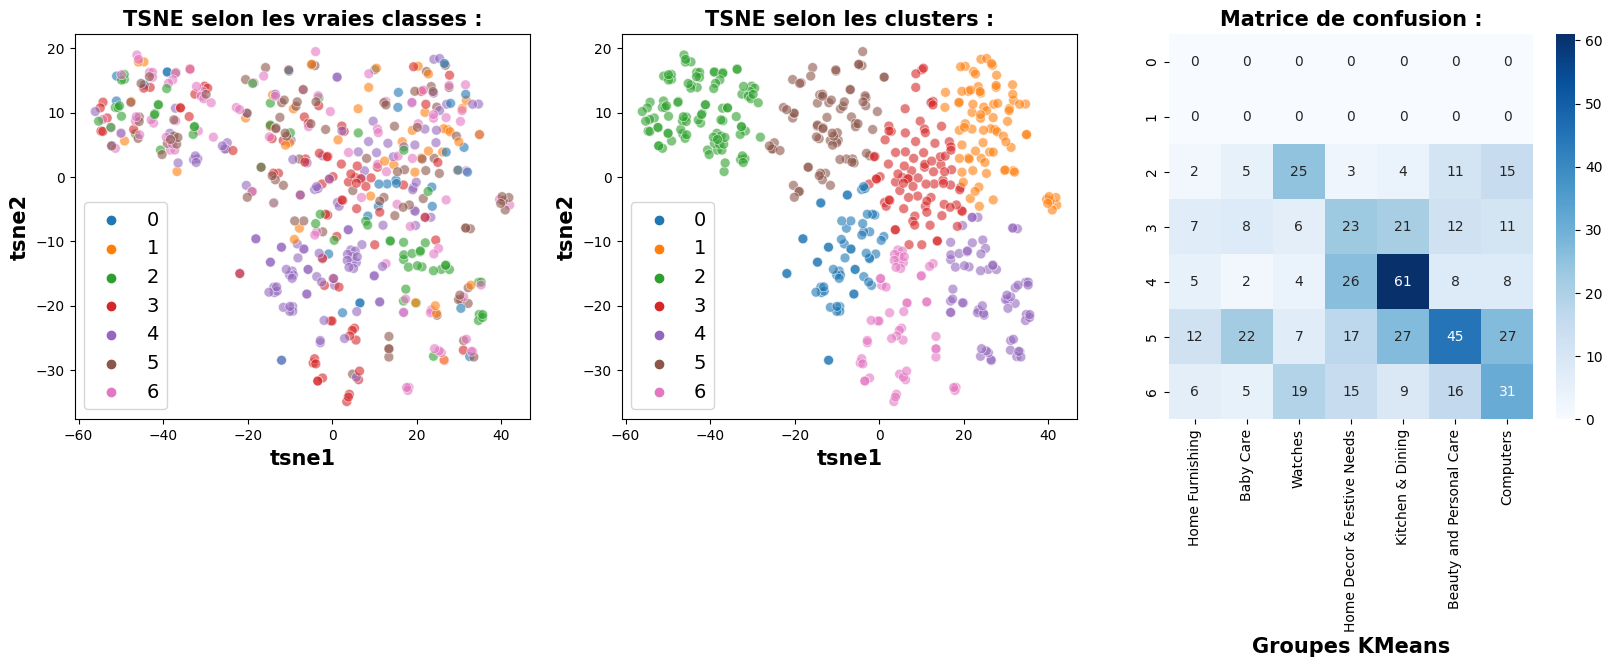

La mesure de ARI est de 0.058 pour ce modèle d'extraction des features.


In [32]:
# Réduction des dimmensions :
X_PCA = PCA(pd.DataFrame(arr.reshape(525,60*768)), 0.99)
X_tsne = TSNE(X_PCA)

# Graphiques et score ARI :
graphsTSNE(X_tsne)

### 4.4.3 : Machine Learning

In [33]:
X = X_PCA
y = P1['TreeNiv1']

In [34]:
# Machine Learning :
X_train, X_test, y_train, y_test = TrainTest (X, y)
Regression = RL(X_train, y_train, X_test, y_test)
DT = DecisionTree(X_train, y_train, X_test, y_test)
KNNs = KNN(X_train, y_train, X_test, y_test)
RF = RandomForest(X_train, y_train, X_test, y_test)
SVMC = SVM(X_train, y_train, X_test, y_test)

# Tableau de résultats
Resultats = pd.DataFrame()
Models = ['Regression', 'DT', 'KNNs', 'RF', 'SVMC']
for model in Models :
    Res = pd.DataFrame(locals()[model]).T.rename(columns = {0:'AccuracyTrain', 1:'AccuracyTest'}).rename(index = {0 : str(model)})
    Resultats = pd.concat([Resultats, Res])
Resultats.sort_values('AccuracyTest', ascending = False)

,AccuracyTrain,AccuracyTest
Regression,1.000,0.949
SVMC,1.000,0.943
RF,1.000,0.899
KNNs,1.000,0.892
DT,0.714,0.734


# 4.5 : USE

### 4.5.1 : Extraction des Features

In [35]:
# USE :
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed(df['DescriptionGlobaleToken'])
embeddings = pd.DataFrame(embeddings)

### 4.5.2 : Reduction dimension et matrice de confusion

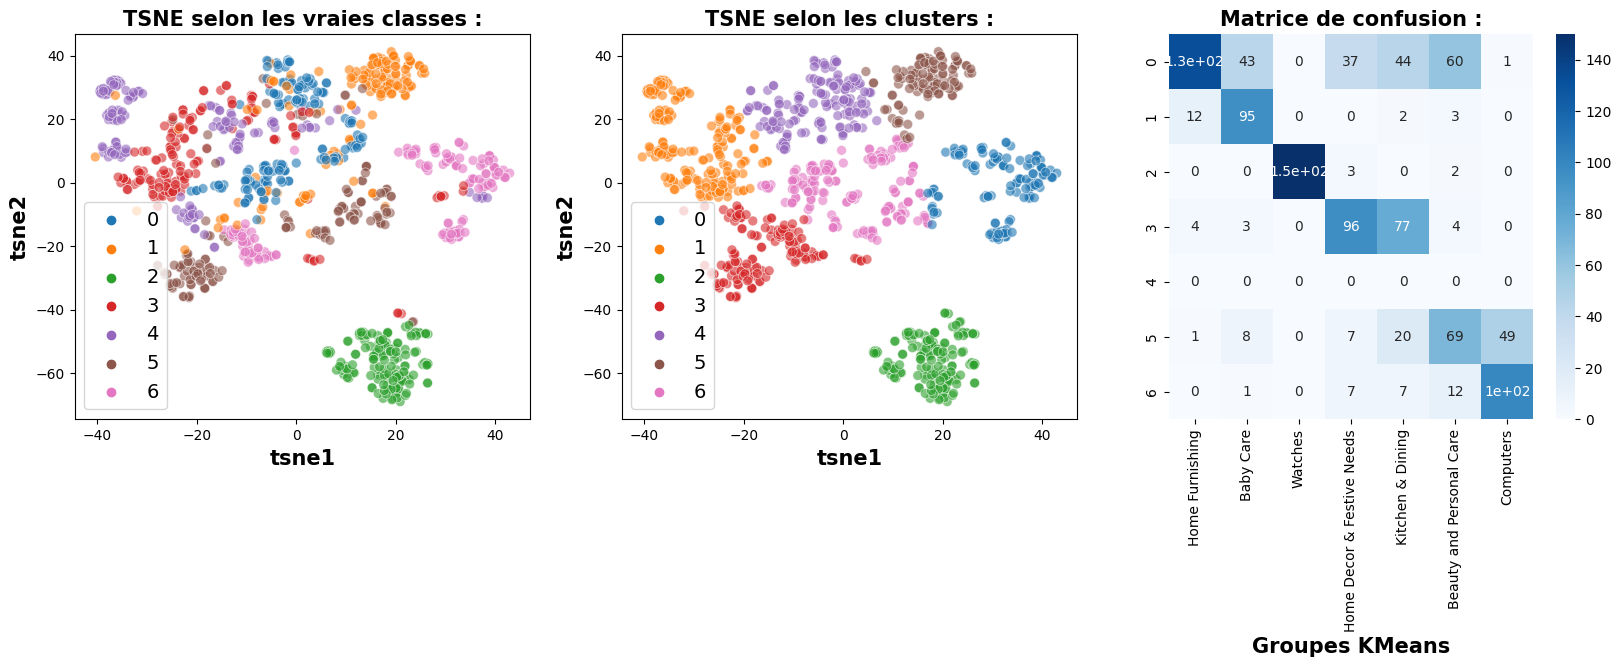

La mesure de ARI est de 0.424 pour ce modèle d'extraction des features.


In [36]:
# Réduction des dimmensions :
X_PCA = PCA(embeddings, 0.99)
X_tsne = TSNE(X_PCA)

# Graphiques et score ARI :
graphsTSNE(X_tsne)

### 4.5.3 : Machine Learning

In [37]:
X = pd.DataFrame(embeddings)
y = df['TreeNiv1']

In [38]:
# Machine Learning :
X_train, X_test, y_train, y_test = TrainTest (X, y)
Regression = RL(X_train, y_train, X_test, y_test)
DT = DecisionTree(X_train, y_train, X_test, y_test)
KNNs = KNN(X_train, y_train, X_test, y_test)
RF = RandomForest(X_train, y_train, X_test, y_test)
SVMC = SVM(X_train, y_train, X_test, y_test)

# Tableau de résultats
Resultats = pd.DataFrame()
Models = ['Regression', 'DT', 'KNNs', 'RF', 'SVMC']
for model in Models :
    Res = pd.DataFrame(locals()[model]).T.rename(columns = {0:'AccuracyTrain', 1:'AccuracyTest'}).rename(index = {0 : str(model)})
    Resultats = pd.concat([Resultats, Res])
Resultats.sort_values('AccuracyTest', ascending = False)

,AccuracyTrain,AccuracyTest
SVMC,1.000,0.921
KNNs,1.000,0.917
Regression,0.946,0.911
RF,0.952,0.886
DT,0.639,0.613


In [39]:
# Exportation des variables du USE :
embeddings.to_csv('ExtractUSE.csv', index = False)